# Example of least squares fitting

Example from AMath 584 lecture of October 12, 2016.  A ball is dropped from height $z_0$ and (noisy) measurements of its height are collected at a set of times.  From this we want to estimate the gravitational force $g$.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Generate sample data:

The data is obtained by evaluating $z(t) = z_0 - \frac{1}{2} g t^2$ at a set of points and then adding some "random errors" to these true values.

`randn(m)` returns `m` random numbers, from a normal distribution with mean 0 and variance 1.

In [2]:
from numpy.random import randn

# set the seed for the random number generator 
# so results are reproducible if we re-run notebook:
from numpy.random import seed
seed(135429)  

In [3]:
z0true = 350.
gtrue = 9.81

def z(t):
    return z0true - 0.5*gtrue*t**2

tdata = linspace(1,8,15)                # times for sample data
zdata = z(tdata) + 15*randn(len(tdata))  # sample data with random errors

Plot the data and also the true function $z(t)$ evaluated on a very fine grid:

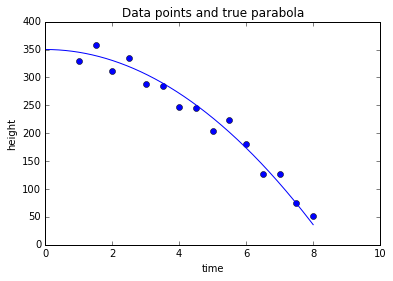

In [4]:
plot(tdata, zdata, 'o')
axis([0,10, 0,400])
ylim
xlabel('time')
ylabel('height')

tfine = linspace(0,8,1000)
zfine = z(tfine)
plot(tfine, zfine, 'b')
title("Data points and true parabola")

## Set up linear system 

Define $A$ so that $a_{i,1} = 1$ and $a_{i,2} = -\frac{1}{2}t_i^2$ and right hand side $b$ with $b_i = z_i$, the measured data:

In [5]:
A = vstack((ones(tdata.shape), -0.5*tdata**2)).T
print "A = \n", A

b = array([zdata]).T
print "b = \n", b


A = 
[[  1.     -0.5  ]
 [  1.     -1.125]
 [  1.     -2.   ]
 [  1.     -3.125]
 [  1.     -4.5  ]
 [  1.     -6.125]
 [  1.     -8.   ]
 [  1.    -10.125]
 [  1.    -12.5  ]
 [  1.    -15.125]
 [  1.    -18.   ]
 [  1.    -21.125]
 [  1.    -24.5  ]
 [  1.    -28.125]
 [  1.    -32.   ]]
b = 
[[ 330.13504726]
 [ 357.78917438]
 [ 311.39454995]
 [ 335.09426404]
 [ 288.76262479]
 [ 284.91452606]
 [ 247.23992463]
 [ 245.69038644]
 [ 203.99034134]
 [ 223.55684179]
 [ 180.71065341]
 [ 127.62560421]
 [ 126.99747953]
 [  75.15864348]
 [  51.54539032]]


## Normal equations

This is not the best way to solve a least squares problem numerically, but works fine for this example:

In [6]:
AA = dot(A.T, A)
print "A^*A = \n", AA
Ab = dot(A.T, b)
print "\nA^*b = \n", Ab

A^*A = 
[[   15.        -186.875   ]
 [ -186.875     3810.109375]]

A^*b = 
[[  3390.60545163]
 [-28502.39359895]]


Solve the $2 \times 2$ linear system $A^*A x = A^*b$ for $x$:

In [7]:
x = solve(AA, Ab)  
print "x = \n", x

x = 
[[ 341.53874386]
 [   9.27077301]]


Recall that the components of x are estimates of the two parameters $z_0$ and $g$.

In [8]:
z0fit = x[0]
gfit = x[1]
print "Estimate of g is %g, true value is %s"  % (gfit,gtrue)

Estimate of g is 9.27077, true value is 9.81


## Plot the parabola based on the estimates:

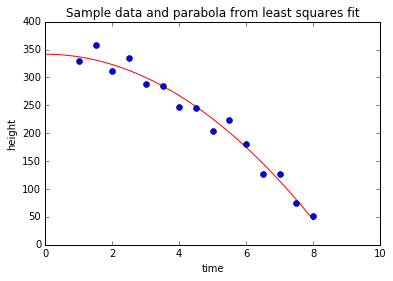

In [9]:
zfit = z0fit - 0.5*gfit*tfine**2
plot(tfine, zfit, 'r')

plot(tdata, zdata, 'o')
axis([0,10, 0,400])
ylim
xlabel('time')
ylabel('height')
title("Sample data and parabola from least squares fit")

## Project data onto range(A)

What happens if we project the right hand side `b = zdata` onto the range of the matrix $A$?  We expect to get points that lie exactly on the best fit parabola.

Let's check this.  We can find an orthonormal basis for the range of $A$ by computing the SVD and using the columns of $U$, which gives an $m \times 2$ matrix $\hat U$.  Hence we can project using the projection matrix $P = \hat U \hat U^*$.

In [10]:
[U,S,Vstar] = svd(A)
Uhat = U[:,0:2]
print "Uhat =\n", Uhat

Uhat =
[[ 0.00887471  0.40383539]
 [ 0.01897574  0.3911249 ]
 [ 0.03311717  0.37333023]
 [ 0.05129902  0.35045136]
 [ 0.07352127  0.3224883 ]
 [ 0.09978393  0.28944105]
 [ 0.130087    0.25130961]
 [ 0.16443049  0.20809397]
 [ 0.20281438  0.15979414]
 [ 0.24523868  0.10641011]
 [ 0.29170339  0.0479419 ]
 [ 0.34220851 -0.01561051]
 [ 0.39675404 -0.08424711]
 [ 0.45533998 -0.1579679 ]
 [ 0.51796633 -0.23677289]]


Compute the projected data vector $\hat b = Pb = \hat U \hat U^* b$.  Note that it is more efficient to comupte this as $\hat U(\hat U^* b)$ than as $(\hat U \hat U^*)b$ since the latter requires forming a $15\times 15$ matrix and doing matrix-vector multiplication with it, whereas the former only involves $15\times 2$ matrices.

In [11]:
bhat = dot(Uhat, dot(Uhat.T,b))
print "bhat = Pb = \n", bhat

bhat = Pb = 
[[ 336.90335736]
 [ 331.10912423]
 [ 322.99719784]
 [ 312.56757821]
 [ 299.82026532]
 [ 284.75525918]
 [ 267.37255978]
 [ 247.67216713]
 [ 225.65408123]
 [ 201.31830208]
 [ 174.66482968]
 [ 145.69366402]
 [ 114.40480511]
 [  80.79825294]
 [  44.87400753]]


We can confirm that b did not lie in the range of $A$ but that $\hat b = Pb$ does by computing the rank of the matrices $[A|b]$ and $[A|\hat b]$.  The first should be 3 and the second should be 2:

In [12]:
print "The rank of [A|b] is ", matrix_rank(hstack((A,b)))
print "The rank of [A|bhat] is ", matrix_rank(hstack((A,bhat)))

The rank of [A|b] is  3
The rank of [A|bhat] is  2


Finally, if we plot the projected data it should lie exactly on the best-fit parabola:

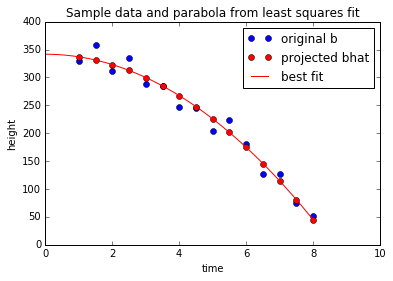

In [13]:
plot(tdata, zdata, 'bo', label="original b")
plot(tdata, bhat, 'ro', label="projected bhat")
plot(tfine, zfit, 'r-', label="best fit")
legend()  # makes a legend based on labels
axis([0,10, 0,400])
ylim
xlabel('time')
ylabel('height')
title("Sample data and parabola from least squares fit")